In [1]:
%pylab inline
import ROOT
import root_numpy
import pandas as pd
import glob
import os.path

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyAmsUtils import tree_to_frame

In [11]:
filenames = sorted(glob.glob("/data/13*.root"), key=os.path.getmtime)[:-1]
#filenames = ["/root/AMSDeutons/test.root"]

In [17]:
def get_frame(f):
    tfile = ROOT.TFile(f)
    tree  = tfile.Get("selections")
    return tree_to_frame(tree, branches=['PhysBPatt']) 

counts = {}
for f in filenames:
    print "Processing: " + f
    frame = get_frame(f)
    counts[f] = frame['PhysBPatt'].value_counts()

Processing: /data/1385801337.00000001.ntuple.root
Processing: /data/1385802707.00000001.ntuple.root
Processing: /data/1385804121.00000001.ntuple.root
Processing: /data/1385805491.00000001.ntuple.root
Processing: /data/1385806905.00000001.ntuple.root
Processing: /data/1385808275.00000001.ntuple.root
Processing: /data/1385809689.00000001.ntuple.root
Processing: /data/1385811060.00000001.ntuple.root
Processing: /data/1385812473.00000001.ntuple.root
Processing: /data/1385813843.00000001.ntuple.root
Processing: /data/1385815257.00000001.ntuple.root
Processing: /data/1385816627.00000001.ntuple.root
Processing: /data/1385818041.00000001.ntuple.root
Processing: /data/1385819412.00000001.ntuple.root
Processing: /data/1385820825.00000001.ntuple.root
Processing: /data/1385822195.00000001.ntuple.root
Processing: /data/1385823609.00000001.ntuple.root
Processing: /data/1385824979.00000001.ntuple.root
Processing: /data/1385826578.00000001.ntuple.root
Processing: /data/1385827763.00000001.ntuple.root


In [23]:
pattcounts = pd.DataFrame(counts).sum(axis=1)
pattcounts.index = pattcounts.index.map(lambda x:np.binary_repr(x,8))

# Counts (linear scale)

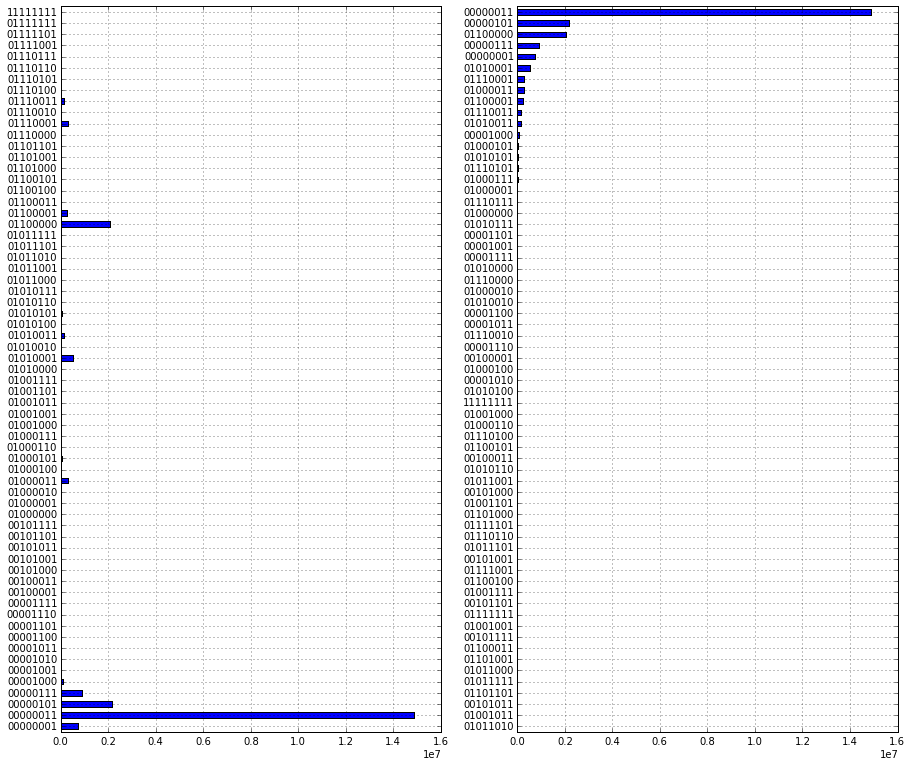

In [24]:
figsize(15,13)
subplot(121);pattcounts.sort_index().plot(kind='barh')
subplot(122);pattcounts.sort(ascending=True); pattcounts.plot(kind='barh')

#Counts (Log scale)

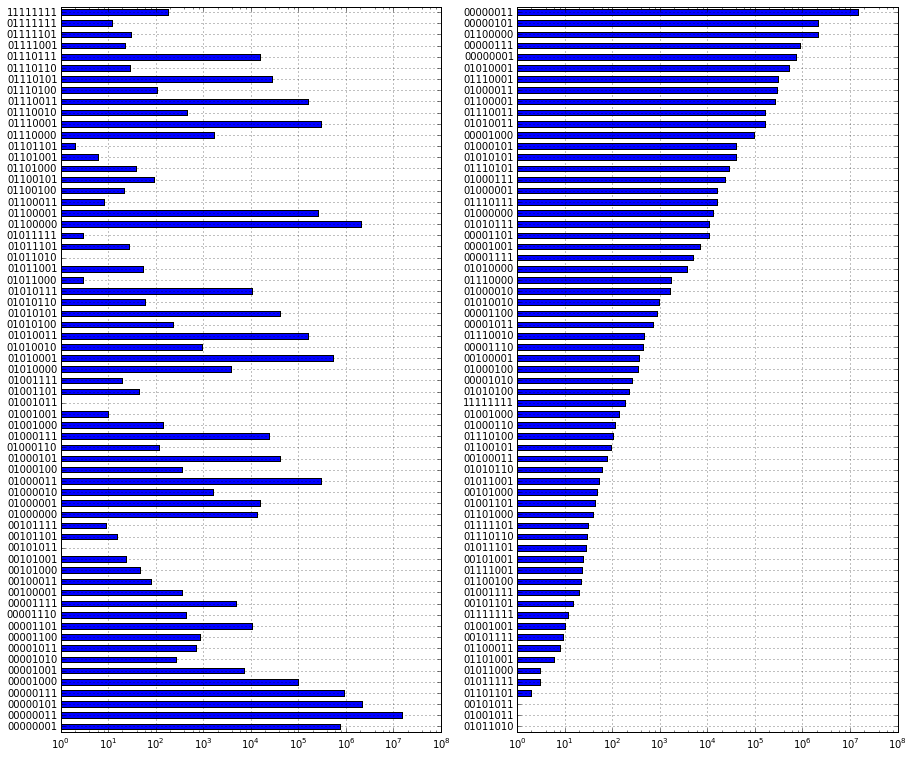

In [25]:
figsize(15,13)
subplot(121);pattcounts.sort_index().plot(kind='barh', logx=True)
subplot(122);pattcounts.sort(ascending=True); pattcounts.plot(kind='barh', logx=True)